In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import LinearSVC

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/SI_hackathon/phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [ ]:
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [ ]:
print(data.shape)
len(data.LongURL.value_counts())
for x in data.columns:
    if len(data[x].value_counts())>=3:
        print(x)

(11054, 32)
Index
LongURL
SubDomains
HTTPS
AnchorURL
LinksInScriptTags
ServerFormHandler
WebsiteTraffic
LinksPointingToPage


In [ ]:
data.dtypes
print(data.columns)

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')


In [ ]:
x = data.drop('class',axis =1)
y = data['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [ ]:
clf = RandomForestClassifier(n_estimators=300)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
clf.score(x_test, y_test)

0.9746835443037974

In [ ]:
y_preds = clf.predict(x_test)
acc = accuracy_score(y_test,y_preds)*100
print(f"Accuracy: {acc:.2f}%")
print(classification_report(y_test,y_preds))

Accuracy: 97.47%
              precision    recall  f1-score   support

          -1       0.98      0.97      0.97       505
           1       0.97      0.98      0.98       601

    accuracy                           0.97      1106
   macro avg       0.97      0.97      0.97      1106
weighted avg       0.97      0.97      0.97      1106



### Cross-Validated training

In [ ]:
cross_val = cross_val_score(clf, x, y, cv = 10,)
print(cross_val)
print(cross_val.mean())

[0.98191682 0.9801085  0.97197107 0.97739602 0.97466063 0.96651584
 0.96289593 0.9520362  0.96651584 0.96651584]
0.9700532676556504


In [ ]:
import pickle
pickle.dump(clf,open("/content/drive/MyDrive/SI_hackathon/classifier-model.pkl",'wb'))

In [ ]:
from joblib import dump,load
dump(clf, filename = "/content/drive/MyDrive/SI_hackathon/classifier-model.joblib")

['/content/drive/MyDrive/SI_hackathon/classifier-model.joblib']

Trying Neural Network

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [ ]:
nn_data = data.copy()

In [ ]:
outputs = {'class': {1:1, -1:0}}
nn_data = nn_data.replace(outputs)
nn_data.head()
nn_data = nn_data.drop("Index",axis=1)

In [ ]:
nn_data['class'].value_counts()

1    6157
0    4897
Name: class, dtype: int64

In [ ]:
data['class'].value_counts()

 1    6157
-1    4897
Name: class, dtype: int64

In [ ]:
x = nn_data.drop('class',axis =1)
y = nn_data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [ ]:
x_train.shape

(9948, 30)

In [ ]:
x_train.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
4720,1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
3241,1,-1,1,1,1,1,1,1,1,1,...,1,-1,1,1,1,1,-1,1,0,1
9556,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,1,1,1,1,-1,1,1,1
8029,-1,-1,-1,1,-1,-1,1,1,-1,1,...,1,1,1,-1,-1,1,-1,-1,1,1
4351,-1,-1,-1,1,-1,-1,0,-1,-1,-1,...,1,-1,1,-1,-1,0,-1,1,1,-1


In [ ]:
y_train.shape

(9948,)

In [ ]:
model = tf.keras.Sequential([
            tf.keras.layers.Dense(300,input_dim = 30, activation='sigmoid'),
            tf.keras.layers.Dense(400,activation='relu'),
            tf.keras.layers.Dense(500,activation='relu'),
            tf.keras.layers.Dense(1,activation='relu')])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
r= model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
311/311 [==============================] - 4s 8ms/step - loss: 6.7381 - accuracy: 0.5565 - val_loss: 6.7560 - val_accuracy: 0.5570
Epoch 2/10
311/311 [==============================] - 2s 7ms/step - loss: 6.7555 - accuracy: 0.5570 - val_loss: 6.7560 - val_accuracy: 0.5570
Epoch 3/10
311/311 [==============================] - 2s 7ms/step - loss: 6.7555 - accuracy: 0.5570 - val_loss: 6.7560 - val_accuracy: 0.5570
Epoch 4/10
311/311 [==============================] - 2s 7ms/step - loss: 6.7555 - accuracy: 0.5570 - val_loss: 6.7560 - val_accuracy: 0.5570
Epoch 5/10
311/311 [==============================] - 3s 9ms/step - loss: 6.7555 - accuracy: 0.5570 - val_loss: 6.7560 - val_accuracy: 0.5570
Epoch 6/10
311/311 [==============================] - 3s 10ms/step - loss: 6.7555 - accuracy: 0.5570 - val_loss: 6.7560 - val_accuracy: 0.5570
Epoch 7/10
311/311 [==============================] - 2s 7ms/step - loss: 6.7555 - accuracy: 0.5570 - val_loss: 6.7560 - val_accuracy: 0.5570
Epoch

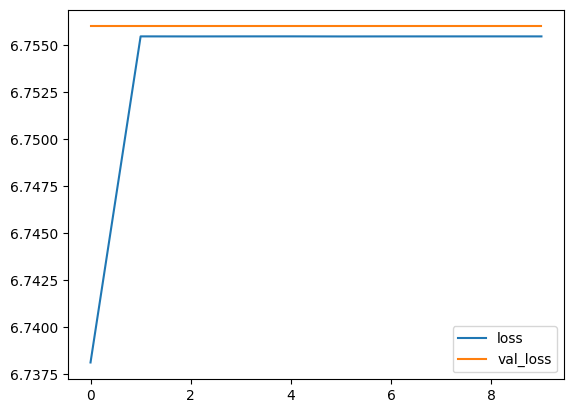

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

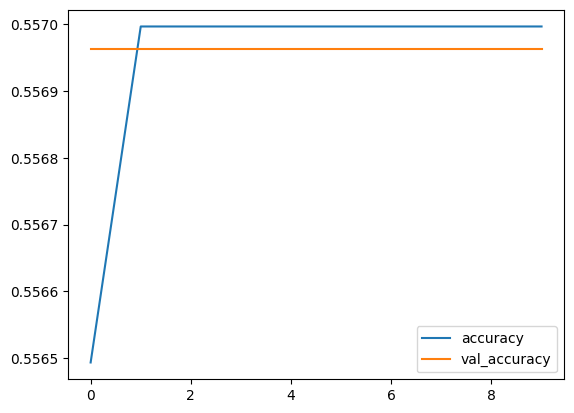

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
print(model.evaluate(x_test,y_test))

35/35 [==============================] - 0s 3ms/step - loss: 6.7560 - accuracy: 0.5570
[6.755992412567139, 0.5569620132446289]


In [ ]:
model.save("/content/drive/MyDrive/SI_hackathon/nn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
